# Twitter API setup

In [14]:
import tweepy
api_key = "6bLBeehdtuPpgyob808XJXZ5j"
api_secret_key = "AeRewrNeNm4zpqWz6qcfzlUF9gaxEasiEb5KRhMzROnzAZK5GW"
access_token_key = "938051948284018694-iikb1q1pLn4RX9JEzgJDuWGseOAjzsq"
access_token_secret_key = "DV6tmV8vDjjQDmikRBzxEcHSDWmp08mmH7406xuXIpQKe"

In [15]:
auth = tweepy.OAuth1UserHandler(
    consumer_key = api_key, 
    consumer_secret = api_secret_key,
    access_token = access_token_key,
    access_token_secret = access_token_secret_key
)

api = tweepy.API(auth)

# Data Extraction

In [16]:
#OnlineLearning
tweets = api.search_tweets(q = ["#OnlineLearning OR #ELearning OR #WorkFromHome -filter:tweets"], lang = "en", count = 100, tweet_mode = "extended")
tweets_list = []
user_name_list = []

for i, tweet in enumerate(tweets):
    
    try:
        tweets_list.append(tweet.retweet_status.extended_tweet.full_text)
        user_name_list.append(tweet.user.screen_name)
    
    except AttributeError:
        tweets_list.append(tweet.full_text)
        user_name_list.append(tweet.user.screen_name)

In [17]:
import pandas as pd
data = pd.DataFrame({"UserName":user_name_list, "Text":tweets_list})
data
data.to_csv("tweets_dataset.csv")

# Data Preprocessing and Text Cleaning

In [18]:
import re
from cleantext import clean

# Cleaning the text
clean_data = []

for i in range(len(data)):
#     review = re.sub("#[a-zA-Z]*"," ", data["Text"][i])                               # Hashtags
    review = re.sub("https:\/\/t.co\/[a-zA-Z0-9]+"," ", data["Text"][i])                      # Websites
    review = re.sub("[h,t,t,p,s,/,:]+…|…", " ", review)                              # Incomplete websites
    review = re.sub("\n","", review)                                                 # Line spacing
    review = re.sub("RT @[a-zA-Z0-9_]+: |rt @[a-zA-Z0-9_]+: "," ", review)           # Retweets
    review = re.sub("@[a-zA-Z0-9_]"," ", review)                                     # Tags
    review = clean(review, no_emoji = True)
#     review = re.sub("[a-zA-Z0-9\/\.:]+…", "", review)                                # Incomplete sentences
    review = re.sub("^ ","", review)                                                # Indentation in begining
    review = re.sub(" +"," ", review)                                                # Unnecessary indentation 
    
    review = review.lower()                                                          # Lower case
    clean_data.append(review)
    
print(clean_data[0])

newly developed system generating life-changing wealth currently looking for additional beta-testers. use this link for free access #makemoneyonline #workfromhome #sidehustle #crypto


# Frequency Distribtution of Hashtags

In [19]:
word_list = []
hashtag_list = []

for sentence in clean_data:
    sentence_split = sentence.split(" ")
    
    for word in sentence_split:
        word_list.append(word)
        
        hashtag_match = re.match("#[a-zA-Z]*", word)
        
        if hashtag_match:
            hashtag_list.append(word)
            
hashtag_list

['#makemoneyonline',
 '#workfromhome',
 '#sidehustle',
 '#crypto',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#byjus',
 '#onlinelearning',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#howtomakemoneyonline',
 '#makemoneyonline',
 '#onlinebusiness',
 '#workfromhome',
 '#entrepreneur',
 '#remotejobs',
 '#remote',
 '#remoteworking',
 '#workfromhome',
 '#homejobs',
 '#remotejob',
 '#virtualassistant',
 '#va',
 '#business',
 '#wealth',
 '#workfromhome',
 '#adminassistant',
 '#executivesupport',
 '#startup',
 '#assistant',
 '#eschoolnews',
 '#eschool',
 '#elearning',
 '#eonline',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment

In [20]:
hashtag_list_final = []

for hashtag in hashtag_list:
    
    if_comma = re.search(",", hashtag)
    
    if if_comma:
        hashtag_sep = hashtag.split(",")
        for i in hashtag_sep:
            hashtag_list_final.append(i)
        
    else:
        hashtag_list_final.append(hashtag)
    
hashtag_list_final

['#makemoneyonline',
 '#workfromhome',
 '#sidehustle',
 '#crypto',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#byjus',
 '#onlinelearning',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment',
 '#',
 '#good',
 '#howtomakemoneyonline',
 '#makemoneyonline',
 '#onlinebusiness',
 '#workfromhome',
 '#entrepreneur',
 '#remotejobs',
 '#remote',
 '#remoteworking',
 '#workfromhome',
 '#homejobs',
 '#remotejob',
 '#virtualassistant',
 '#va',
 '#business',
 '#wealth',
 '#workfromhome',
 '#adminassistant',
 '#executivesupport',
 '#startup',
 '#assistant',
 '#eschoolnews',
 '#eschool',
 '#elearning',
 '#eonline',
 '#onlinejob',
 '#workfromhome',
 '#onlinebusiness',
 '#0%investment

In [21]:
from nltk.probability import FreqDist

frequency_counter = FreqDist()

for hashtags in hashtag_list_final:
    frequency_counter[hashtags] += 1
    
frequency_counter

FreqDist({'#workfromhome': 48, '#elearning': 17, '#learning': 10, '#makemoneyonline': 9, '#onlinebusiness': 9, '#onlinelearning': 9, '#onlinejob': 8, '#0%investment': 7, '#': 7, '#good': 7, ...})

In [22]:
df = pd.DataFrame.from_dict(frequency_counter, orient = "index")
df.columns = ["Count"]
df = df.sort_values(by = "Count", ascending = False)
df = df.head(10)
df

,Count
#workfromhome,48
#elearning,17
#learning,10
#onlinebusiness,9
#onlinelearning,9
#makemoneyonline,9
#onlinejob,8
#0%investment,7
#,7
#javascript,7


C:\Users\rajve\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


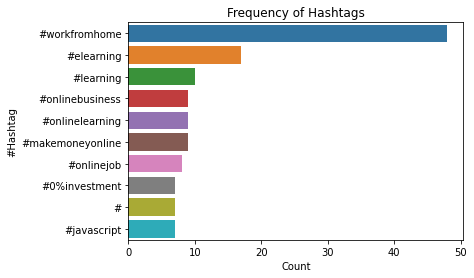

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.barplot(x = df.values, y = df.index)
sns.barplot(df["Count"].values, df.index)
plt.title("Frequency of Hashtags")
plt.xlabel("Count")
plt.ylabel("#Hashtag")
plt.show()

# Sentiment Analysis/ Natural Language Processing

In [24]:
tweets = clean_data
tweets

['newly developed system generating life-changing wealth currently looking for additional beta-testers. use this link for free access #makemoneyonline #workfromhome #sidehustle #crypto',
 '#onlinejob #workfromhome #onlinebusiness #0%investment # whatsapp 9113028492 #good morning',
 '#onlinejob #workfromhome #onlinebusiness #0%investment # whatsapp 9113028492 #good morning',
 '#onlinejob #workfromhome #onlinebusiness #0%investment # whatsapp 9113028492 #good morning',
 'haryana: students of classes 10-12 to get free tablets, internet data in may | mint #byjus #onlinelearning',
 '#onlinejob #workfromhome #onlinebusiness #0%investment # whatsapp 9113028492 #good morning',
 '#onlinejob #workfromhome #onlinebusiness #0%investment # whatsapp 9113028492 #good morning',
 'vision builds hope into you, your business, your company and your future for a better tomorrow. #howtomakemoneyonline #makemoneyonline #onlinebusiness #workfromhome #entrepreneur',
 'new remote job executive assistant #remote

In [25]:
from textblob import TextBlob
sentiment_list = []
for text in tweets:
    nature = TextBlob(text)
    
    if nature.sentiment.polarity == 0:
        sentiment_list.append("Neutral")
        
    elif nature.sentiment.polarity < 0:
        sentiment_list.append("Negative")
        
    elif nature.sentiment.polarity > 0:
        sentiment_list.append("Positive")
    
sentiment_list

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',


In [26]:
sentiment_data = pd.DataFrame({"Tweet": tweets, "Sentiment": sentiment_list})
sentiment_data.to_csv("sentiment_tweets")
sentiment_data

,Tweet,Sentiment
0,newly developed system generating life-changin...,Positive
1,#onlinejob #workfromhome #onlinebusiness #0%in...,Positive
2,#onlinejob #workfromhome #onlinebusiness #0%in...,Positive
3,#onlinejob #workfromhome #onlinebusiness #0%in...,Positive
4,haryana: students of classes 10-12 to get free...,Positive
...,...,...
90,#biztips #workfromhome brand-new method of get...,Neutral
91,are you team office or team remote? #workfromhome,Negative
92,slicing a cylinder in rotation by diagonal giv...,Neutral
93,providing amazing online courses.we offer you ...,Positive
